In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

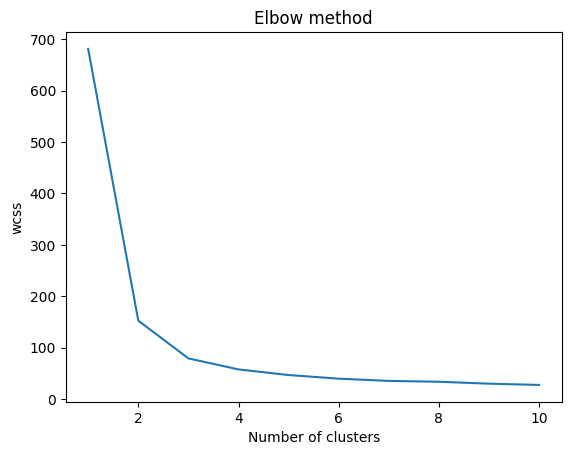

In [ ]:
# Within-clusters sum square
wcss = []
for i in range(1, 11):
  cluster = KMeans(
      n_clusters=i, # number of clusters to form
      init="k-means++", # k-means++ => selects seeds based on sampling
      max_iter=300, # max 300 iterations
      n_init=1, # tries with i different seeds, n times
      random_state=0, # deterministic random state for seed-picking
  )
  cluster.fit(iris.data)
  # sum square distances of samples to cluster center
  wcss.append(cluster.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

The elbow point is the optimal number of clusters (3 clusters in this example)

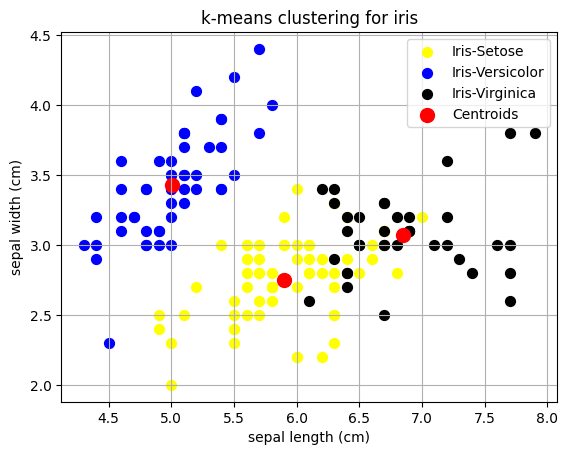

In [ ]:
cluster = KMeans(
    n_clusters=3, init="k-means++", max_iter=30000, n_init=100, random_state=0
)
y_predict = cluster.fit_predict(iris.data)
x = iris.data

plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s=50, c='yellow', label='Iris-Setose')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s=50, c='blue', label='Iris-Versicolor')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s=50, c='black', label='Iris-Virginica')
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('k-means clustering for iris')
plt.grid()
plt.legend()
plt.show()